#                            Python Logging Module
####                   ( Track Debug & Monitor Like a Pro! )

### 1. Getting Started with Logging

### Step 1: Import and Basic setup

In [54]:
# Step1: Import logging module
import logging
logging.root.handlers = [] # Clear existing handlers
# Step2: Configure logging settings
logging.basicConfig(level=logging.DEBUG)
# Step3: Log messages with different levels
logging.debug("This is a debug message")
logging.info("This is an info message")
logging.warning("This is a warning message")
logging.error("This is an error message")
logging.critical("This is a critical message")

DEBUG:root:This is a debug message
INFO:root:This is an info message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


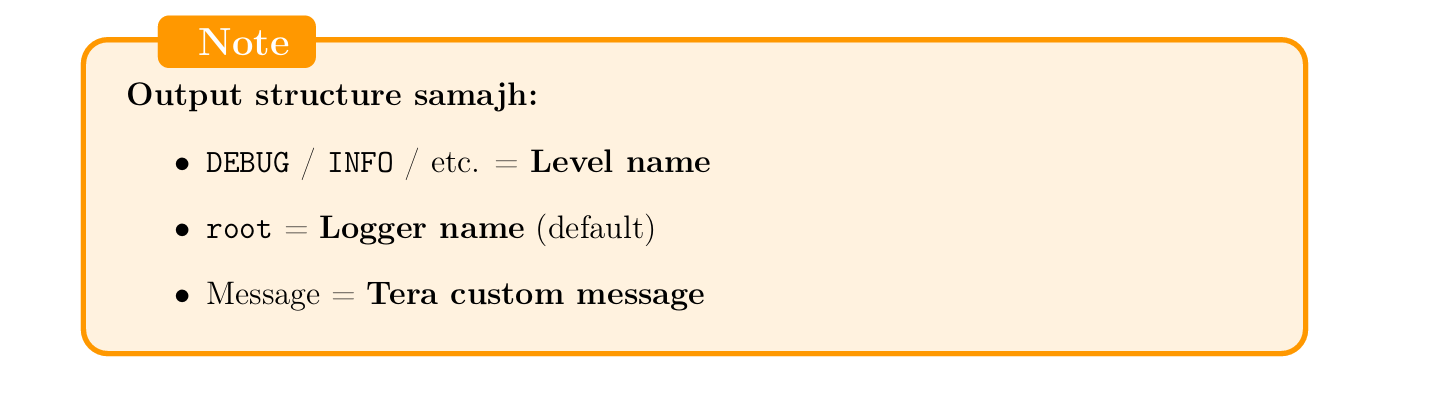

### 2. Logging Levels - 5 Severity Types

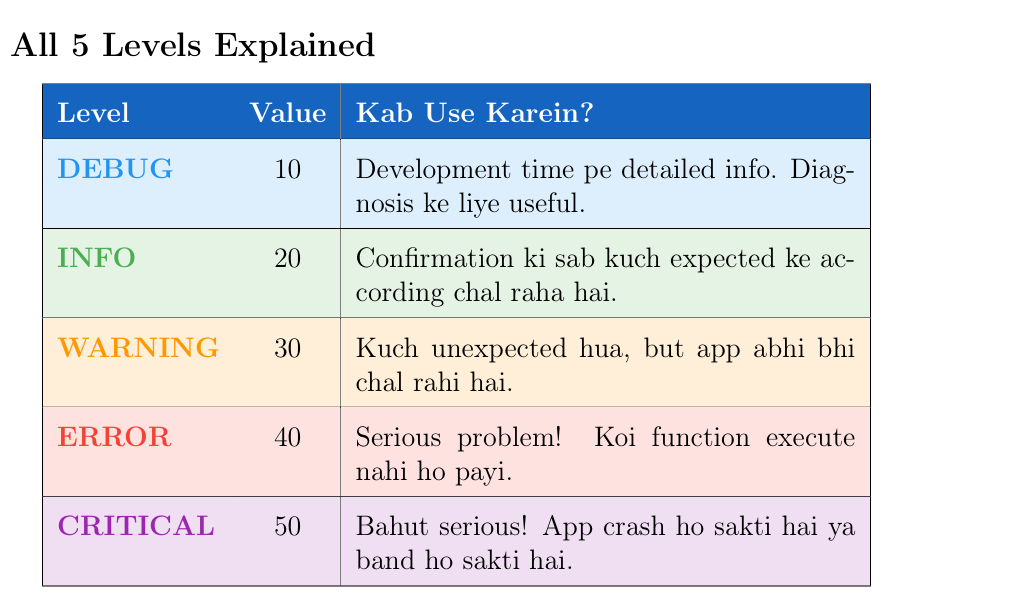

If we set the logging level to DEBUG, all messages with a severity level of DEBUG or higher will be shown.

If we set the logging level to WARNING, all messages with a severity level of WARNING or higher will be shown.


### 3. Configuring Logging-Custom Format       

In [52]:
import logging
logging.root.handlers = [] # Clear existing handlers
# Custom Configuration
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)
# Log messages with different levels
logging.debug("This is a debug message")
logging.info("This is an info message")
logging.warning("This is a warning message")
logging.error("This is an error message")
logging.critical("This is a critical message")

2025-12-16 17:49:28 - root - DEBUG - This is a debug message
2025-12-16 17:49:28 - root - INFO - This is an info message
2025-12-16 17:49:28 - root - WARNING - This is a warning message
2025-12-16 17:49:28 - root - ERROR - This is an error message
2025-12-16 17:49:28 - root - CRITICAL - This is a critical message


NOTE : In case of logging.INFO we can't see the DEBUG messages
    But, when we set the level to logging.DEBUG we can see all the messages,

    because DEBUG level is the lowest level


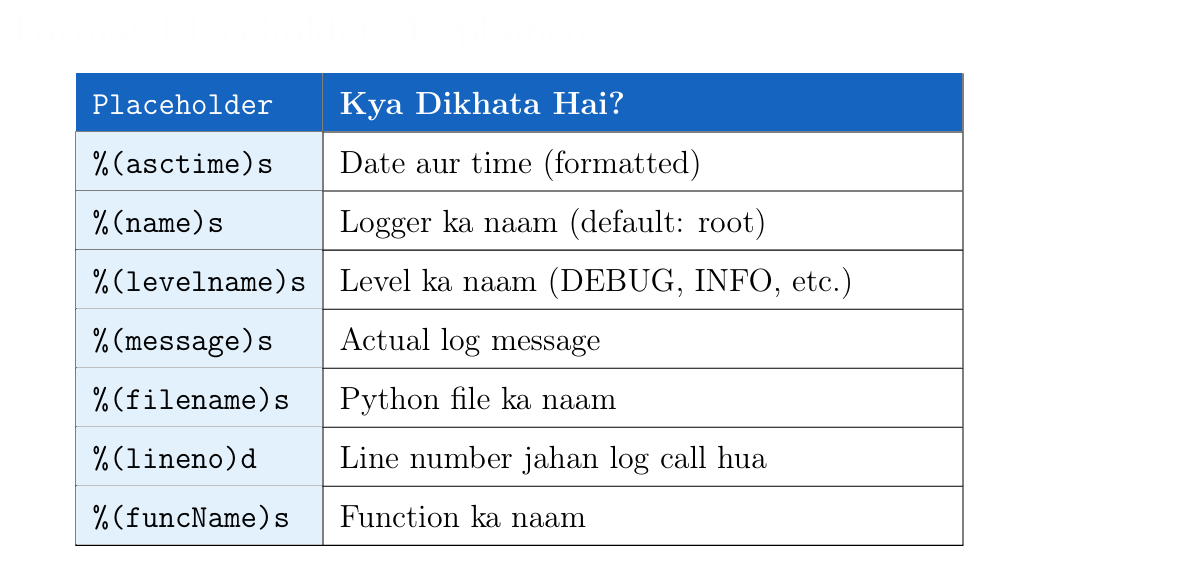

### 4. Logging to Files

NOTE : In production we save logs to files instead of console Why?
1. After application restart we can't see logs in console
2. Files provide the permanent storage of logs

#### 4.1 Using filename parameter

In [79]:
import logging
logging.root.handlers = []
# Configure logging to write to a file
logging.basicConfig(
    level=logging.INFO, # Set minimum log level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    filename='temp.log',
    filemode='w', # 'w' for write, 'a' for append
)
# These message will go to the file 'app.log'
logging.debug("Debug message - saved to file")
logging.info("Info message - saved to file")
logging.warning("Warning message - saved to file")
logging.error("Error message - saved to file")
logging.critical("Critical message - saved to file")

print("Logging complete. Check 'app.log' for log messages.")


Logging complete. Check 'app.log' for log messages.


#### 4.2 Using Handlers

**Critical Warning:**

basicConfig() sirf ek baar kaam karta hai! Agar pehle se configured hai aur dobara call kiya, toh kuch nahi hoga!

**Solution:**
 Kernel/Script restart karo ya **logging.root.handlers = []** karke re-set karo.

In [59]:
import logging
logging.root.handlers = []  # Clear existing handlers
# Configure with handlers
logging.basicConfig(
    level=logging.DEBUG,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    handlers=[
        logging.FileHandler("app.log"), # Logs to a file
        logging.StreamHandler()         # Logs to console
    ]
)
# Now log to both file and console!
logging.info("This message goes to both console and file.")
logging.error("Error logged everywhere!")


2025-12-16 17:50:29 - root - INFO - This message goes to both console and file.
2025-12-16 17:50:29 - root - ERROR - Error logged everywhere!


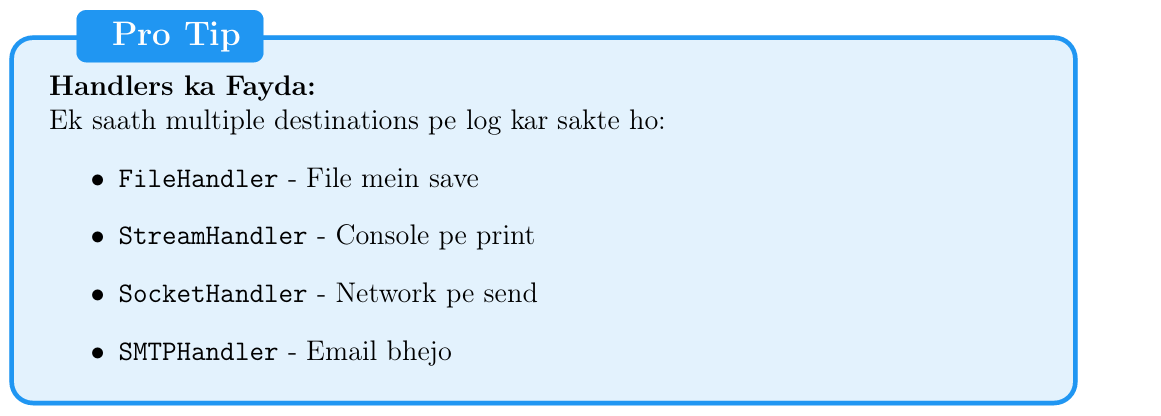

### 5. Multiple Loggers - Module-wise Logging

**Problem:**

 In big applications, we have multiple modules. Each module has its own logger. We want to log the messages from each module in a separate log file. We don't want to mix the log messages from different modules in a single log file.

**Solution :** 

Create a separate logger for each module using getLogger(). Each logger will log the messages in a separate log file.

In [77]:
import logging
logging.root.handlers = []
logging.basicConfig (
                    level=logging.DEBUG,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S'
                   )                   
# Create logger for Module 1
logger_module1 = logging.getLogger('module1')
logger_module1.setLevel(logging.DEBUG)
# Create logger for Module 2
logger_module2 = logging.getLogger('module2')
logger_module2.setLevel(logging.ERROR) # only log errors and above
# use loggers in modules
logger_module1.debug('This is a debug message from module 1')
logger_module1.info('This is an info message from module 1')
logger_module2.warning('This is a warning message from module 2')
logger_module2.error('This is an error message from module 2')
logger_module1.critical('This is a critical message from module 1')

2025-12-16 18:24:52 - module1 - DEBUG - This is a debug message from module 1
2025-12-16 18:24:52 - module1 - INFO - This is an info message from module 1
2025-12-16 18:24:52 - module2 - ERROR - This is an error message from module 2
2025-12-16 18:24:52 - module1 - CRITICAL - This is a critical message from module 1


**Levels order** DEBUG < INFO < WARNING < ERROR < CRITICAL

That's why ('This is a warning message from module 2') this message note came as output, because this meassage belongs to logger_module2 which is set to log WARNING level and above.


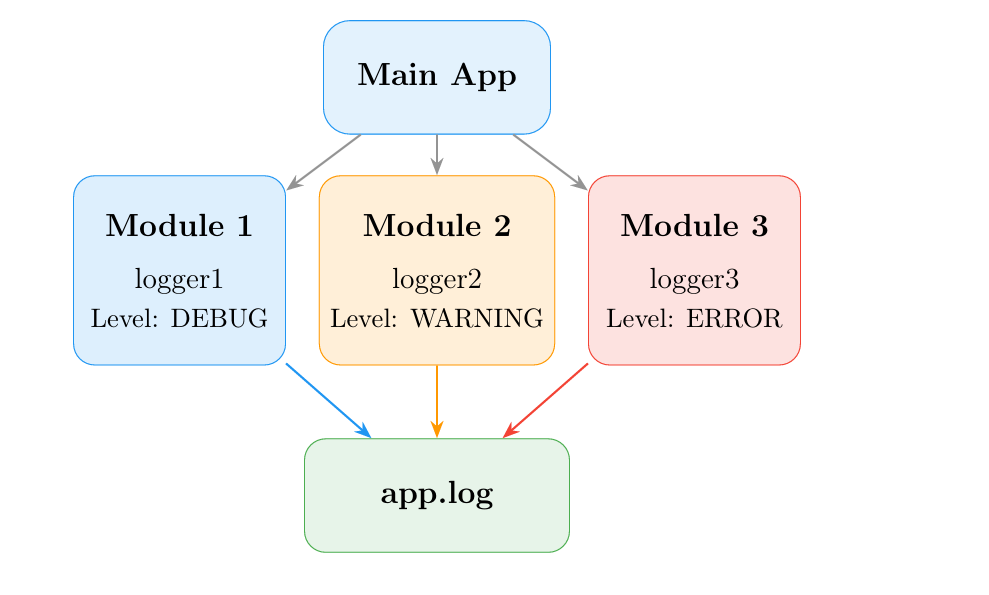

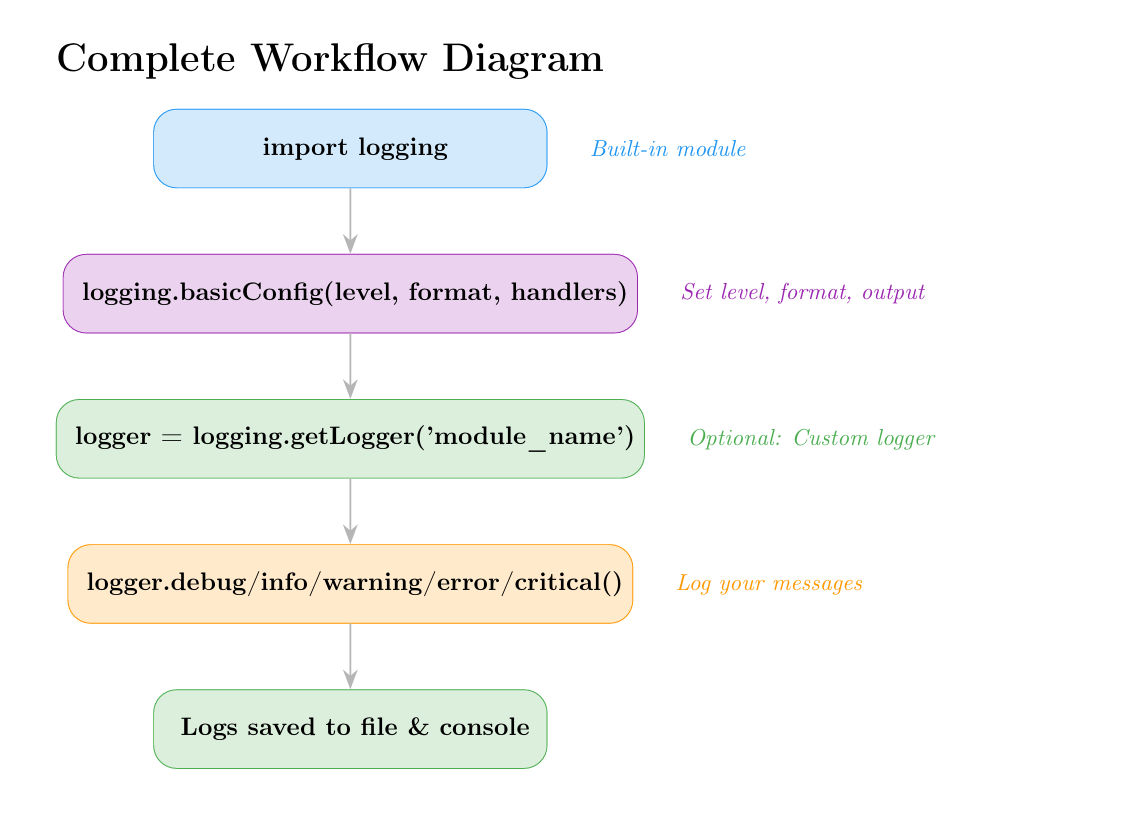

### ========= LOGGING Quick Commands =========

```python
# ========= IMPORT =========
import logging

# ========= BASIC CONFIG =========
logging.basicConfig(
    level=logging.DEBUG,                 # Minimum level
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    filename='app.log',                  # Optional: log to file
    filemode='a'                         # 'a'=append,
                                         # 'w'=overwrite
)

# ========= WITH HANDLERS =========
logging.basicConfig(
    level=logging.DEBUG,
    handlers=[
        logging.FileHandler('app.log'),
        logging.StreamHandler()
    ]
)

# ========= CUSTOM LOGGER =========
logger = logging.getLogger('my_module')
logger.setLevel(logging.DEBUG)

# ========= LOG MESSAGES =========
logging.debug("Detailed info for debugging")
logging.info("Confirmation message")
logging.warning("Something unexpected")
logging.error("Serious problem!")
logging.critical("App may crash!")

# ========= LOGGING LEVELS (Low to High) =========
# DEBUG < INFO < WARNING < ERROR < CRITICAL
#   10      20       30        40        50
```
